In [1]:
# run this cell to setup matplotlib, and also import the very important take_picture function from camera!
%matplotlib notebook
import matplotlib.pyplot as plt
from camera import take_picture
import numpy as np

In [2]:
# run this cell to download the models from dlib
from dlib_models import download_model, download_predictor, load_dlib_models
download_model()
download_predictor()
from dlib_models import models

File already exists:
	/Users/Jenny/Desktop/BWSI WORK/DlibModels/dlib_models/dlib_face_recognition_resnet_model_v1.dat
File already exists:
	/Users/Jenny/Desktop/BWSI WORK/DlibModels/dlib_models/shape_predictor_68_face_landmarks.dat


Let's take a picture to test this out!

In [5]:
from piccle import pickOpen,pickSave

dataface = pickOpen()

<IPython.core.display.Javascript object>


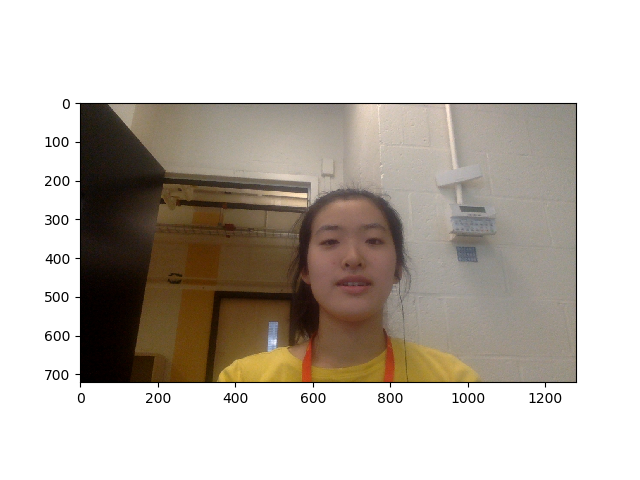

In [16]:
fig,ax = plt.subplots()
pic = take_picture()
ax.imshow(pic)

<IPython.core.display.Javascript object>


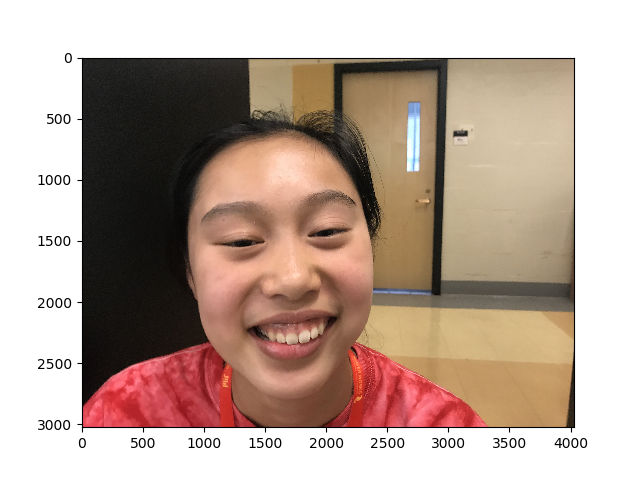

In [98]:
from image_file_to_image_array import image_file_to_image_array
pic = image_file_to_image_array("data/Christina/IMG_5012.JPG")
fig, ax = plt.subplots()
ax.imshow(pic)

Hello gorgeous!! Now, let's see if we can detect any faces.

In [99]:
# first, we load the models that dlib has to detect faces.
load_dlib_models()
face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]

In [100]:
detections = list(face_detect(pic))
print(detections)

[rectangle(853,1030,2450,2628)]


Heck yeah, we got a face, which is a step in the right direction. However, in order to match names with faces, we need to be able to distinguish *between* faces. Luckily, dlib has this cool feature called a "face descriptor vector". Think of a face descriptor as a numerical representation of the intricacies of your face. Run the code below to SEE the descriptor vector!

<IPython.core.display.Javascript object>


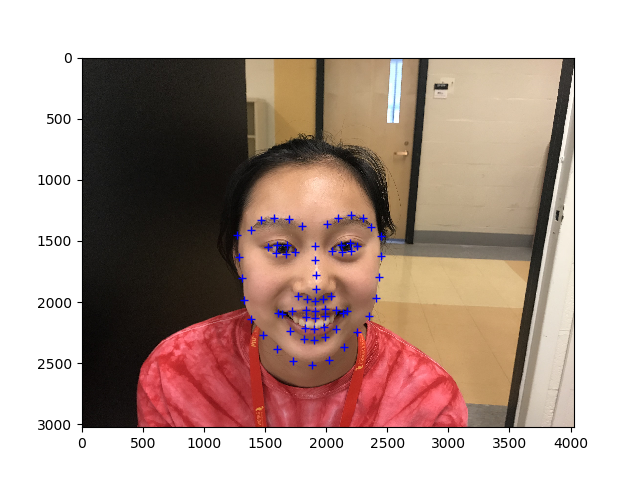

Number of faces detected: 1


In [90]:
from matplotlib.patches import Rectangle
fig,ax = plt.subplots()
ax.imshow(pic)


print("Number of faces detected: {}".format(len(detections)))
for k, d in enumerate(detections):
    # Get the landmarks/parts for the face in box d.
    shape = shape_predictor(pic, d)
    # Draw the face landmarks on the screen.
    for i in range(68):
        ax.plot(shape.part(i).x,shape.part(i).y,'+',color="blue")

In [101]:
# let's take a look as to what the descriptor is!!
shape = shape_predictor(pic, detections[0])
descriptor = np.array(face_rec_model.compute_face_descriptor(pic, shape))
print(descriptor)
print(descriptor.shape)

[-7.89072961e-02 -3.50445189e-04  6.08588904e-02 -8.05093795e-02
 -8.65417123e-02  1.98050048e-02 -5.41160181e-02 -1.10927634e-01
  1.76150292e-01 -1.76958412e-01  2.53166586e-01 -6.25472888e-02
 -2.04449907e-01 -5.96005283e-02 -3.91439721e-02  2.05754921e-01
 -1.40925273e-01 -1.28857255e-01 -3.10811438e-02 -8.79405066e-03
  8.22479427e-02 -3.81794237e-02 -6.92861974e-02  3.47604714e-02
 -7.27488250e-02 -3.71743768e-01 -1.55306861e-01 -2.16643885e-02
  7.98994675e-04 -4.00488824e-02 -6.66112527e-02  8.42564851e-02
 -2.00071439e-01 -5.03886640e-02  2.50412114e-02  5.11234179e-02
  1.73406936e-02 -1.13473214e-01  1.23991847e-01  3.65646207e-03
 -2.23999202e-01 -5.18624554e-04  2.45254189e-02  1.82573929e-01
  1.20036758e-01 -1.27622150e-02  4.92478274e-02 -1.41879827e-01
  1.28265709e-01 -1.65456817e-01 -1.34325097e-03  1.29453763e-01
  1.04729183e-01  4.59510274e-02 -4.29942925e-03 -1.44637018e-01
  1.13645131e-02  9.54400152e-02 -8.47114027e-02 -1.49678960e-02
  3.21224779e-02 -5.43795

In [102]:
from getting_name_dataface import match_descriptor_in_dataface

match_descriptor_in_dataface(dataface, np.array([descriptor]), threshold=.4)

['Christina']

In [97]:
from dataface_add import dataface_add

dataface_add(dataface, "Christina", descriptor)

In [104]:
pickSave(dataface)